In [1]:
import os
import pandas as pd
%matplotlib inline

# Import pprint to use to preview
# pulled news
from pprint import pprint

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
from newsapi import NewsApiClient

# Retrieve the News API key
api_key = os.getenv("NEWSAPI_KEY")

# Check contents type of News API key variable
type(api_key)

str

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

btc_news_en['articles'][0]['content']

"At least that's the idea. While it's not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars]"

In [6]:
# Fetch the Ethereum news articles
eth_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)
eth_news_en['articles'][0]['content']

"TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top… [+1491 chars]"

In [7]:
def create_df(news):
    articles = []
    for article in news:
        # Sentiment scoring with VADER
        text_sentiment = analyzer.polarity_scores(article['content'])
        try:
            compound = text_sentiment['compound']
            negative = text_sentiment['neg']
            neutral = text_sentiment['neu']
            positive = text_sentiment['pos']
            text = str(article['content'])

            articles.append({
                'Compound': compound,
                'Negative': negative,
                'Neutral': neutral,
                'Positive': positive,
                'Text': text
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = create_df(btc_news_en['articles'])
btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
1,-0.6486,0.139,0.817,0.044,"Since its inception in 2009, Bitcoin has made ..."
2,-0.7845,0.154,0.846,0.000,New allegations against a bitcoin developer sp...
3,-0.4767,0.069,0.931,0.000,Say it with me: Bitcoin is not anonymous. \r\n...
4,0.0258,0.080,0.859,0.061,Federal authorities in the U.S. have unsealed ...


In [9]:
# Create the ethereum sentiment scores DataFrame
eth_df = create_df(eth_news_en["articles"])
eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.4404,0.0,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
1,0.3818,0.0,0.933,0.067,IKEA Iceland has used Ethereum ETHtechnology t...
2,0.6249,0.0,0.900,0.100,Disrupt Berlin is right around the corner. And...
3,0.2263,0.0,0.960,0.040,At least that's the idea. While it's not as in...
4,0.4601,0.0,0.915,0.085,"he plaBy now, you should almost certainly know..."


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.312675,0.024200,0.910650,0.065150
std,0.439946,0.048259,0.037119,0.030386
min,-0.784500,0.000000,0.817000,0.000000
25%,0.274900,0.000000,0.885250,0.060500
50%,0.507000,0.000000,0.931000,0.068000
75%,0.507000,0.010500,0.932000,0.069000
max,0.687900,0.154000,0.960000,0.117000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.158165,0.031050,0.910200,0.058700
std,0.377470,0.052945,0.072668,0.042425
min,-0.823200,0.000000,0.735000,0.000000
25%,0.000000,0.000000,0.885000,0.030750
50%,0.238150,0.000000,0.930000,0.059000
75%,0.411525,0.045750,0.945750,0.075250
max,0.624900,0.210000,1.000000,0.139000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
# Expand the default stop words list if necessary

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    "Tokenizes text."
    
    # Create a list of the words
    words_tokenized = []
    for word in text:
        tokenized_words = word_tokenize(word['content'])
        words_tokenized.append(tokenized_words)
    
    # Convert the words to lowercase
    words_lower = [[word.lower()for word in words] for words in words_tokenized]
    
    # Remove the stop words and punctuation
    # (Could not figure out how to remove punctuation
    # before removing stop words)
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = [[regex.sub('', word) for word in words] for words in words_lower]
    
    # Lemmatize Words into root words
    tokens = [[lemmatizer.lemmatize(word) for word in words] for words in re_clean]
    
    return tokens

In [16]:
# Create a new tokens column for bitcoin
btc_df['Tokens'] = tokenizer(btc_news_en['articles'])
btc_df

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[at, least, that, s, the, idea, , while, it, s..."
1,-0.6486,0.139,0.817,0.044,"Since its inception in 2009, Bitcoin has made ...","[since, it, inception, in, , , bitcoin, ha, ma..."
2,-0.7845,0.154,0.846,0.000,New allegations against a bitcoin developer sp...,"[new, allegation, against, a, bitcoin, develop..."
3,-0.4767,0.069,0.931,0.000,Say it with me: Bitcoin is not anonymous. \r\n...,"[say, it, with, me, , bitcoin, is, not, anonym..."
4,0.0258,0.080,0.859,0.061,Federal authorities in the U.S. have unsealed ...,"[federal, authority, in, the, u, have, unseale..."
5,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tl, , dr, , the, indepth, complete, blockchai..."
6,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...,"[our, robot, colleague, satoshi, nakaboto, wri..."
7,0.5070,0.000,0.932,0.068,Our robot colleague Satoshi Nakaboto writes ab...,"[our, robot, colleague, satoshi, nakaboto, wri..."
8,0.5070,0.000,0.932,0.068,Our robot colleague Satoshi Nakaboto writes ab...,"[our, robot, colleague, satoshi, nakaboto, wri..."
9,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,"[our, robot, colleague, satoshi, nakaboto, wri..."


In [17]:
# Create a new tokens column for ethereum
eth_df['Tokens'] = tokenizer(eth_news_en['articles'])
eth_df

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tl, , dr, , the, indepth, complete, blockchai..."
1,0.3818,0.000,0.933,0.067,IKEA Iceland has used Ethereum ETHtechnology t...,"[ikea, iceland, ha, used, ethereum, ethtechnol..."
2,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, is, right, around, the, corn..."
3,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[at, least, that, s, the, idea, , while, it, s..."
4,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know...","[he, plaby, now, , you, should, almost, certai..."
5,0.4019,0.000,0.932,0.068,TLDR: The Complete Blockchain and Ethereum Pro...,"[tldr, , the, complete, blockchain, and, ether..."
6,0.1027,0.054,0.882,0.063,"Further to its previous blockchain exploits, t...","[further, to, it, previous, blockchain, exploi..."
7,0.2500,0.033,0.911,0.056,"Australias Perth Mint, one of the worlds large...","[australia, perth, mint, , one, of, the, world..."
8,0.0000,0.000,1.000,0.000,Announced at Ethereum Foundation's Devcon 5 co...,"[announced, at, ethereum, foundation, s, devco..."
9,-0.5095,0.082,0.886,0.032,The total transactional volume of blockchain a...,"[the, total, transactional, volume, of, blockc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
def bigram_counter(article_list): 
    # Combine all articles in corpus into one large string
    big_string = []
    for article in article_list:
        string = ''.join(article['content'])
        big_string.append(string)
    tokenized = [word_tokenize(word) for word in big_string]
    flat_list = [item for sublist in tokenized for item in sublist]
    bigrams = ngrams(flat_list, n=2)
    top_bigrams = dict(Counter(bigrams).most_common(20))
    return top_bigrams

In [20]:
"""
bigram counter when source is the articles
straight from the API

def bigram_counter(article_list): 
    # Combine all articles in corpus into one large string
    big_string = []
    for article in article_list:
        string = ''.join(article['content'])
        big_string.append(string)
    tokenized = [word_tokenize(word) for word in big_string]
    flat_list = [item for sublist in tokenized for item in sublist]
    bigrams = ngrams(flat_list, n=2)
    top_bigrams = dict(Counter(bigrams).most_common(20))
    return top_bigrams
"""

"\nbigram counter when source is the articles\nstraight from the API\n\ndef bigram_counter(article_list): \n    # Combine all articles in corpus into one large string\n    big_string = []\n    for article in article_list:\n        string = ''.join(article['content'])\n        big_string.append(string)\n    tokenized = [word_tokenize(word) for word in big_string]\n    flat_list = [item for sublist in tokenized for item in sublist]\n    bigrams = ngrams(flat_list, n=2)\n    top_bigrams = dict(Counter(bigrams).most_common(20))\n    return top_bigrams\n"

In [21]:
# Generate the Bitcoin N-grams where N=2
bigram_counter(btc_news_en['articles'])

{('Satoshi', 'Nakaboto'): 28,
 ('chars', ']'): 20,
 ('in', 'the'): 15,
 ('Welcome', 'to'): 15,
 (']', 'Our'): 14,
 ('Our', 'robot'): 14,
 ('robot', 'colleague'): 14,
 ('colleague', 'Satoshi'): 14,
 ('Nakaboto', 'writes'): 14,
 ('writes', 'about'): 14,
 ('about', 'Bitcoin'): 14,
 ('Bitcoin', 'BTC'): 14,
 ('BTC', 'every'): 14,
 ('every', 'fucking'): 14,
 ('fucking', 'day'): 14,
 ('day', '.'): 14,
 ('.', 'Welcome'): 14,
 ('to', 'another'): 14,
 ('another', 'edition'): 14,
 ('edition', 'of'): 14}

In [22]:
# Generate the Ethereum N-grams where N=2
bigram_counter(eth_news_en['articles'])

{('chars', ']'): 20,
 ('…', '['): 7,
 ('.', 'The'): 6,
 ('of', 'the'): 5,
 (',', 'and'): 4,
 ('Bitcoin', ','): 3,
 (',', 'you'): 3,
 ('now', ','): 3,
 ('with', 'a'): 3,
 ('Ethereum', ','): 3,
 (',', 'the'): 3,
 ('.', 'According'): 3,
 ('According', 'to'): 3,
 (']', 'The'): 3,
 ('to', 'the'): 3,
 ('dark', 'mode'): 3,
 (':', 'The'): 2,
 ('Complete', 'Blockchain'): 2,
 ('Blockchain', 'and'): 2,
 ('and', 'Ethereum'): 2}

In [23]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens_list, N=10):
    """Returns the top N tokens from the frequency count"""
    for tokens in tokens_list:
        return Counter(tokens).most_common(N)

In [24]:
# Get the top 10 words for Bitcoin
btc_top_ten = token_count(btc_df['Tokens'])
btc_top_ten

[('', 8),
 ('the', 4),
 ('a', 4),
 ('s', 2),
 ('while', 2),
 ('it', 2),
 ('power', 2),
 ('at', 1),
 ('least', 1),
 ('that', 1)]

In [25]:
# Get the top 10 words for Ethereum
eth_top_ten = token_count(eth_df['Tokens'])
eth_top_ten

[('', 12),
 ('the', 4),
 ('it', 4),
 ('and', 2),
 ('is', 2),
 ('on', 2),
 ('when', 2),
 ('come', 2),
 ('to', 2),
 ('tl', 1)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [27]:
def column_iter(tokens_column):
    crypto_tokens = []
    for tokens_list in tokens_column:
        for tokens in tokens_list:
            crypto_tokens.append(tokens)
    big_string = ' '.join(crypto_tokens)
    return big_string

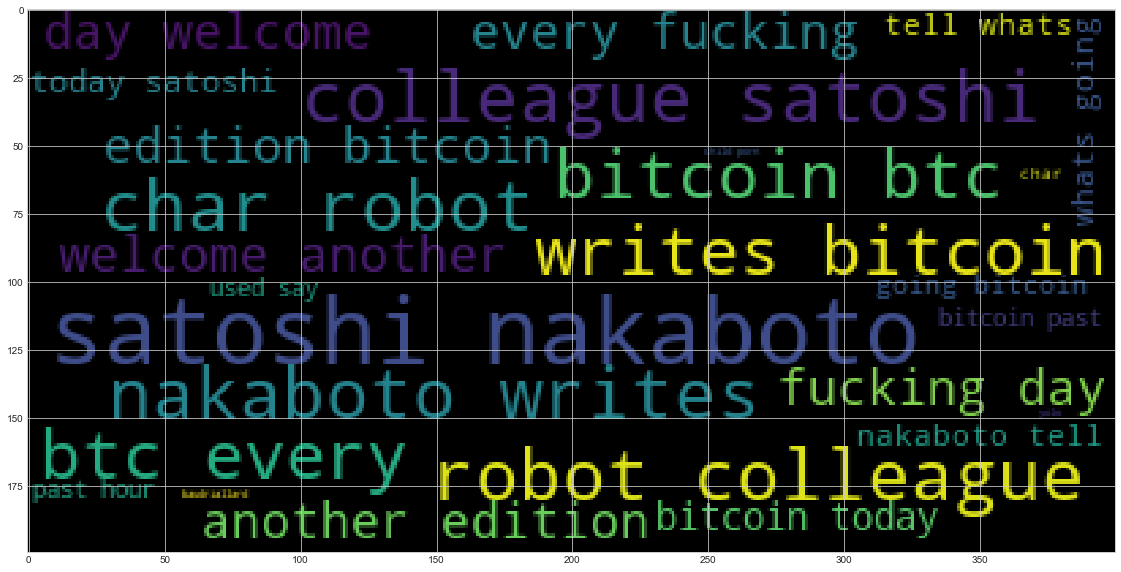

In [28]:
# Generate the Bitcoin word cloud
btc_tokens = column_iter(btc_df['Tokens'])

wc = WordCloud().generate(btc_tokens)
plt.imshow(wc)

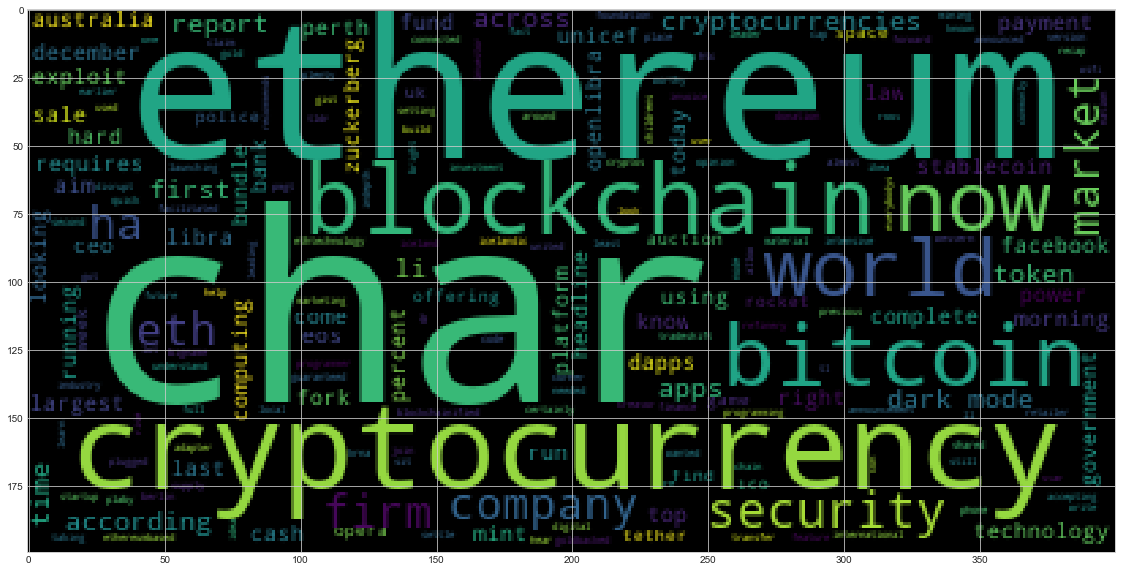

In [29]:
# Generate the Ethereum word cloud
eth_tokens = column_iter(eth_df['Tokens'])
eth_tokens

wc = WordCloud().generate(eth_tokens)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [33]:
# Concatenate all of the bitcoin text together
btc_tokens

'at least that s the idea  while it s not a intensive a mining bitcoin  running a full node still requires a lot of computing power  in fact  htc recommends only using the feature while the phone is connected to wifi and plugged into it power adapter  the c   char  since it inception in   bitcoin ha made and ruined fortune  helped sell fentanyl and book about cryptocurrency  withstood literally million of joke and just a many prediction of imminent collapse  andthrough a process opaque to most people  myself   char  new allegation against a bitcoin developer spurred a deposition from jacob appelbaum photo by ingo wagner  getty image in the summer of   a flood of abuse allegation came out against celebrity tor developer jacob appelbaum  a shocking blow to one of   char  say it with me  bitcoin is not anonymous  three hundred and thirtyseven alleged member of a massive dark web child pornography website were reminded of that fact last year when they were arrested by a global coalition of

In [34]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_tokens)

# Add a title to the document

In [35]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [41]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
btc_entities

['million',
 'jacob appelbaum',
 'the summer',
 'jacob appelbaum  ',
 'three hundred and thirtyseven',
 'last year',
 'south korean',
 'satoshi nakaboto',
 'today',
 'the past  hour',
 'satoshi nakaboto',
 'today',
 'the past  hour',
 'satoshi nakaboto',
 'today',
 'the past  hour',
 'un',
 'char',
 'satoshi nakaboto',
 'today',
 'the past  hour',
 'satoshi nakaboto',
 'today',
 'the past  hour',
 'yolo  ',
 'satoshi nakaboto',
 'today',
 'the past  hour',
 'satoshi nakaboto',
 'today',
 'the past  hour',
 'satoshi nakaboto',
 'today',
 'the past  hour',
 'satoshi nakaboto',
 'today',
 'the past  hour',
 'yolo  ',
 'satoshi nakaboto',
 'today',
 'the past  hour  ',
 'satoshi nakaboto',
 'today',
 'the past  hour',
 'satoshi nakaboto',
 'today',
 'the past  hour',
 'satoshi nakaboto',
 'today',
 'the past  hour',
 'yolo  ',
 'satoshi nakaboto',
 'today',
 'the past  hour  ',
 'nikola']

---

## Ethereum NER

In [42]:
# Concatenate all of the bitcoin text together
eth_tokens

'tl  dr  the indepth complete blockchain and ethereum programmer bundle is on sale for just   with the code learn  when it come to bitcoin  you get the gist  cryptocurrency is on the rise right now  it s a worthy investment  and it when it come to top   char  ikea iceland ha used ethereum ethtechnology to settle an invoice with a local retailer  accepting payment in blockchainified digital cash  supply chain payment firm tradeshift facilitated the transfer using an ethereumbased version of the icelandic krna    char  disrupt berlin is right around the corner  and there is plenty to look forward to  join u december  and december  to hear from industry leader  investor  and bright star in the startup world  we  ll sit down with ceo from bigname company such a a   char  at least that s the idea  while it s not a intensive a mining bitcoin  running a full node still requires a lot of computing power  in fact  htc recommends only using the feature while the phone is connected to wifi and pl

In [43]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_tokens)

# Add a title to the document

In [44]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [45]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
eth_entities

['berlin',
 'december',
 'december',
 'second',
 'today',
 'today',
 'western australia  ',
 'first',
 'osaka',
 'japan',
 'six',
 'last quarter',
 'nearly  percent',
 'q of this year',
 'char  makerdao  ',
 'char  good',
 'the weekend',
 'ukrainian',
 'venezuela',
 'four',
 'char  reuters',
 'li  ',
 'wednesday',
 'june',
 'mark zuckerberg',
 'li',
 'li  zuckerberg',
 'the world fourth',
 'only percent',
 'first',
 'last week',
 'chinese',
 'us',
 'char  ',
 'london',
 'uk',
 'this week',
 'first',
 'uk',
 'two']